In [9]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import matplotlib
#import seaborn as sb
#sb.set()

In [10]:
def load_data():
    symbols = [ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT']

    n = len(symbols)
    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('%s.csv' % s, index_col=None, parse_dates=['Date'])
        prices = list(dataframe['Close'])[-506:] # trailing window 506 days 2 roz bishtar vase roze aval va akhar ezafe
        prices_out.append(prices)
       
    return symbols, prices_out 

names, prices = load_data()   
n = len(names)

In [11]:
#prices

In [12]:
prices = np.array(prices)

In [13]:
#prices[:,0:8]

In [14]:
pd.DataFrame(prices)

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,163.050003,166.720001,169.039993,166.889999,168.110001,172.500000,174.250000,174.809998,176.240005,175.880005,...,236.410004,240.509995,239.960007,243.179993,243.580002,246.580002,249.050003,243.289993,243.259995,248.759995
1,83.809998,83.889999,83.180000,83.180000,84.050003,84.139999,84.470001,84.269997,84.559998,84.089996,...,137.410004,138.429993,136.369995,137.240005,139.940002,140.729996,144.190002,142.830002,144.610001,143.369995
2,234.740005,231.020004,230.190002,230.179993,232.229996,232.220001,230.309998,230.050003,229.830002,228.389999,...,163.100006,165.940002,167.539993,168.759995,161.889999,166.089996,169.059998,168.809998,168.369995,164.990005
3,1100.949951,1110.849976,1105.280029,1103.680054,1094.219971,1111.599976,1120.660034,1123.170044,1132.880005,1129.130005,...,1757.510010,1785.660034,1765.729980,1762.170044,1780.780029,1761.329956,1777.079956,1762.709961,1779.989990,1776.660034
4,1019.270020,1017.109985,1016.640015,1025.500000,1025.579956,1032.479980,1025.900024,1033.329956,1039.849976,1031.260010,...,1245.489990,1246.150024,1242.800049,1259.130005,1260.989990,1265.130005,1290.000000,1262.619995,1261.290039,1260.109985
5,101.769997,101.410004,100.610001,100.919998,101.589996,101.410004,100.779999,98.750000,97.639999,97.629997,...,120.559998,123.550003,124.790001,125.120003,125.029999,126.029999,126.510002,126.430000,125.730003,124.919998
6,48.740002,49.110001,49.240002,49.549999,49.590000,49.540001,49.480000,48.230000,47.750000,46.750000,...,52.669998,53.450001,53.470001,53.490002,53.049999,53.580002,54.000000,54.240002,53.680000,53.049999


In [15]:
a = pd.read_csv('pricing.csv', index_col=0)

assetst = a [-506:]
#assets = np.array(assets)
assetst[0:5]
#prices = list(assets)

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
Date,,,,,,,
10/27/2017,163.050003,83.809998,234.740005,1100.949951,1019.270020,101.769997,48.740002
10/30/2017,166.720001,83.889999,231.020004,1110.849976,1017.109985,101.410004,49.110001
10/31/2017,169.039993,83.180000,230.190002,1105.280029,1016.640015,100.610001,49.240002
11/1/2017,166.889999,83.180000,230.179993,1103.680054,1025.500000,100.919998,49.549999
11/2/2017,168.110001,84.050003,232.229996,1094.219971,1025.579956,101.589996,49.590000


In [16]:
returns = assetst.pct_change().dropna()

In [17]:
returns.head()

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
Date,,,,,,,
10/30/2017,0.022508,0.000955,-0.015847,0.008992,-0.002119,-0.003537,0.007591
10/31/2017,0.013915,-0.008463,-0.003593,-0.005014,-0.000462,-0.007889,0.002647
11/1/2017,-0.012719,0.000000,-0.000043,-0.001448,0.008715,0.003081,0.006296
11/2/2017,0.007310,0.010459,0.008906,-0.008571,0.000078,0.006639,0.000807
11/3/2017,0.026114,0.001071,-0.000043,0.015883,0.006728,-0.001772,-0.001008


In [18]:
returns.columns

Index(['AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT'], dtype='object')

### Hierarchical Clustering

> Hierarchical clustering can be performed with a distance matrix. Then it repeatedly executed the following 2 steps:
1. Start by treating indivisual items as a cluster. Identify 2 clusters that are closest together
2. merge the 2 most similar clusters.

> This continues until all the clusters are merge together.


> The distance between 2 clusters can be computed based on length of the straight line, which is the Euclidean distance. This is called **measure of distance/similarity.**

> After selecting a distance metric, it is necessary to determine from where distance is computed. For example, it can be computed between the 2 similar parts of a cluster, the 2 least similar or some other criterion. This is called **Linkage Criteria**

In [19]:
# correlation matrix
corr = returns.corr()

In [20]:
# distance matrix
d_corr = np.sqrt(0.5*(1-corr))
d_corr

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
AAPL,0.000000,0.415798,0.519366,0.431654,0.432512,0.515514,0.580314
MSFT,0.415798,0.000000,0.500041,0.351623,0.359990,0.484098,0.551038
MMM,0.519366,0.500041,0.000000,0.529161,0.515758,0.457840,0.527750
AMZN,0.431654,0.351623,0.529161,0.000000,0.386775,0.525982,0.587180
GOOG,0.432512,0.359990,0.515758,0.386775,0.000000,0.501494,0.563706
JPM,0.515514,0.484098,0.457840,0.525982,0.501494,0.000000,0.315545
BBT,0.580314,0.551038,0.527750,0.587180,0.563706,0.315545,0.000000


In [21]:
link = linkage(d_corr, 'single')
link

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([[ 5.        ,  6.        ,  0.4693822 ,  2.        ],
       [ 1.        ,  3.        ,  0.50214967,  2.        ],
       [ 4.        ,  8.        ,  0.51128368,  3.        ],
       [ 0.        ,  9.        ,  0.59971518,  4.        ],
       [ 2.        ,  7.        ,  0.68172486,  3.        ],
       [10.        , 11.        ,  0.75354111,  7.        ]])

In [22]:
Z = pd.DataFrame(link)
Z

,0,1,2,3
0,5.0,6.0,0.469382,2.0
1,1.0,3.0,0.502150,2.0
2,4.0,8.0,0.511284,3.0
3,0.0,9.0,0.599715,4.0
4,2.0,7.0,0.681725,3.0
5,10.0,11.0,0.753541,7.0


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5]],
 'dcoord': [[0.0, 0.5021496714188343, 0.5021496714188343, 0.0],
  [0.0, 0.5112836837974589, 0.5112836837974589, 0.5021496714188343],
  [0.0, 0.5997151758528342, 0.5997151758528342, 0.5112836837974589],
  [0.0, 0.4693821952981529, 0.4693821952981529, 0.0],
  [0.0, 0.6817248573226322, 0.6817248573226322, 0.4693821952981529],
  [0.5997151758528342,
   0.7535411111751568,
   0.7535411111751568,
   0.6817248573226322]],
 'ivl': ['0', '4', '1', '3', '2', '5', '6'],
 'leaves': [0, 4, 1, 3, 2, 5, 6],
 'color_list': ['g', 'g', 'b', 'r', 'b', 'b']}

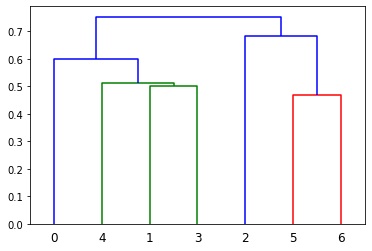

In [23]:
dn = dendrogram(Z)
dn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


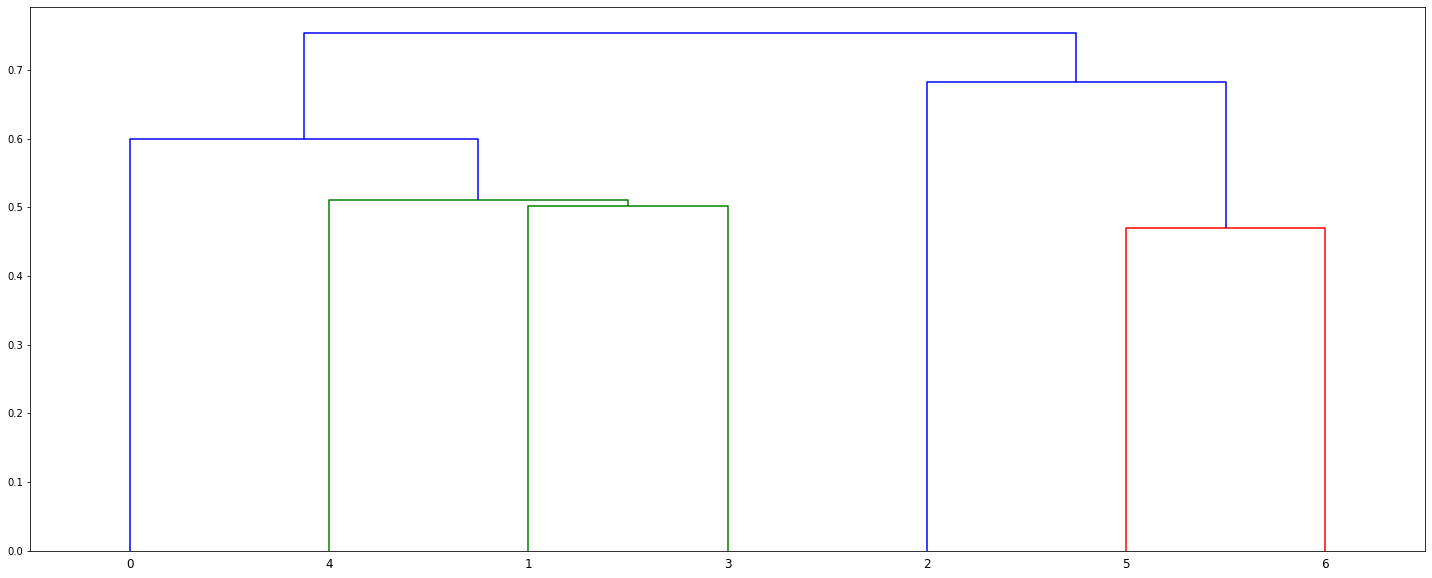

In [24]:
link = linkage(d_corr, 'single')
link
Z = pd.DataFrame(link)

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [25]:
sb.heatmap(corr)

NameError: name 'sb' is not defined

In [26]:
sb.clustermap(corr,method='single')

NameError: name 'sb' is not defined

In [27]:
returns.columns

Index(['AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT'], dtype='object')

In [28]:
Z

,0,1,2,3
0,5.0,6.0,0.469382,2.0
1,1.0,3.0,0.502150,2.0
2,4.0,8.0,0.511284,3.0
3,0.0,9.0,0.599715,4.0
4,2.0,7.0,0.681725,3.0
5,10.0,11.0,0.753541,7.0


> This stage allows us to define a linkage matrix as an (N-1)x4 matrix with structure $Y = \{(y_{m,1},y_{m,2},y_{m,3},y_{m,4})\}_{m=1,...N-1}$ (i.e, with one 4-tuple per cluster). Items ($y_{m,1}, y_{m.2}$) report the constituents. Item $y_m,3$ reports the distance between $y_{m,1}$ and $y_{m,2}$. Item $y_{m,4}$ reports the number of original items included in cluster $m$

### Quasi-Diagonalization

> This stage reorganizes the rows and columns of the covariance matrix, so that the largest values lie along the diagonal. This quasi-diagonalization of the covariance matrix renders a useful property - similar investments are placed together, and dissimilar investments are placed far apart. 

> The algorithm works as follows -
1. We know that each row of the linkage matrix megers 2 branches into 1. We replace clusters in ($y_{N-1, 1}, y_{N-1,2}$) with their constituents recursively, until no clusters remain.
2. These replacemnets preserve the order of the clustering.
3. The output is a sorted list fo original items. 

In [29]:
def get_quasi_diag(link):
    
    # sort clustered items by distance
    
    link = link.astype(int)
    
    # get the first and the second item of the last tuple
    sort_ix = pd.Series([link[-1,0], link[-1,1]]) 
    
    # the total num of items is the third item of the last list
    num_items = link[-1, 3]
    
    # if the max of sort_ix is bigger than or equal to the max_items
    while sort_ix.max() >= num_items:
        # assign sort_ix index with 24 x 24
        sort_ix.index = range(0, sort_ix.shape[0]*2, 2) # odd numers as index
        
        df0 = sort_ix[sort_ix >= num_items] # find clusters
        
        # df0 contain even index and cluster index
        i = df0.index
        j = df0.values - num_items # 
        
        sort_ix[i] = link[j,0] # item 1
        
        df0  = pd.Series(link[j, 1], index=i+1)
        
        sort_ix = sort_ix.append(df0)
        sort_ix = sort_ix.sort_index()
        
        sort_ix.index = range(sort_ix.shape[0])
        
    
    return sort_ix.tolist()

In [30]:
sort_ix = get_quasi_diag(link)
sort_ix

[0, 4, 1, 3, 2, 5, 6]

### Recursive Bisection

> Stage 2 has delivered a quasi-diagonal matrix. The inverse - variance is optimal for a diagonal covariance matrix. We can take advantage of these facts in 2 different ways 
1. bottom-up, to define the variance of a contiguous subset as teh variance of an inverse-variance allocation.
2. top-down, to split allocations between adjacent subsets in inverse proportion to their aggregated variances.

In [31]:
def get_cluster_var(cov, c_items):
    cov_ = cov.iloc[c_items, c_items] # matrix slice
    # calculate the inversev-variance portfolio
    ivp = 1./np.diag(cov_)
    ivp/=ivp.sum()
    w_ = ivp.reshape(-1,1)
    c_var = np.dot(np.dot(w_.T, cov_), w_)[0,0]
    return c_var
def get_rec_bipart(cov, sort_ix):
    # compute HRP allocation
    # intialize weights of 1
    w = pd.Series(1, index=sort_ix)
    
    # intialize all items in one cluster
    c_items = [sort_ix]
    while len(c_items) > 0:
        # bisection
        """
        [[3, 6, 0, 9, 2, 4, 13], [5, 12, 8, 10, 7, 1, 11]]
        [[3, 6, 0], [9, 2, 4, 13], [5, 12, 8], [10, 7, 1, 11]]
        [[3], [6, 0], [9, 2], [4, 13], [5], [12, 8], [10, 7], [1, 11]]
        [[6], [0], [9], [2], [4], [13], [12], [8], [10], [7], [1], [11]]
        """
        c_items = [i[int(j):int(k)] for i in c_items for j,k in 
                   ((0,len(i)/2),(len(i)/2,len(i))) if len(i)>1]
        
        # now it has 2
        for i in range(0, len(c_items), 2):
            
            c_items0 = c_items[i] # cluster 1
            c_items1 = c_items[i+1] # cluter 2
            
            c_var0 = get_cluster_var(cov, c_items0)
            c_var1 = get_cluster_var(cov, c_items1)
            
            alpha = 1 - c_var0/(c_var0+c_var1)
            
            w[c_items0] *= alpha
            w[c_items1] *=1-alpha
    return w

In [32]:
cov = returns.cov()
weights = get_rec_bipart(cov, sort_ix)
weights

0    0.166039
4    0.105809
1    0.118906
3    0.103403
2    0.164550
5    0.174181
6    0.167113
dtype: float64

In [33]:
new_index = [returns.columns[i] for i in weights.index]
weights.index = new_index

In [34]:
weights.index

Index(['AAPL', 'GOOG', 'MSFT', 'AMZN', 'MMM', 'JPM', 'BBT'], dtype='object')

In [35]:
weights

AAPL    0.166039
GOOG    0.105809
MSFT    0.118906
AMZN    0.103403
MMM     0.164550
JPM     0.174181
BBT     0.167113
dtype: float64

In [36]:
aaaa = weights.sort_index(ascending=True)
aaaa

AAPL    0.166039
AMZN    0.103403
BBT     0.167113
GOOG    0.105809
JPM     0.174181
MMM     0.164550
MSFT    0.118906
dtype: float64

In [37]:
dtype(weights)

NameError: name 'dtype' is not defined

In [44]:
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np
import scipy.optimize as so
import seaborn as sb
sb.set()
%pylab
%matplotlib inline


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [45]:
prices = np.array(prices)

day	|	AAPL 	MSFT 	MMM 	AMZN 	GOOG 	JPM 	BBT 	|	Budget
----------------------------------------------------------------------------------------------------
0	|	0	0	0	0	0	0	0	|	1000000
{'icoord': [[5.0, 5.0, 15.0, 15.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [35.0, 35.0, 52.5, 52.5], [25.0, 25.0, 43.75, 43.75], [10.0, 10.0, 34.375, 34.375]], 'dcoord': [[0.0, 0.4565072782535037, 0.4565072782535037, 0.0], [0.0, 0.44532196624696674, 0.44532196624696674, 0.0], [0.0, 0.5471098034731728, 0.5471098034731728, 0.44532196624696674], [0.0, 0.6258659025014073, 0.6258659025014073, 0.5471098034731728], [0.0, 0.6993698323434524, 0.6993698323434524, 0.6258659025014073], [0.4565072782535037, 0.7076435913506762, 0.7076435913506762, 0.6993698323434524]], 'ivl': ['5', '6', '2', '0', '3', '1', '4'], 'leaves': [5, 6, 2, 0, 3, 1, 4], 'color_list': ['g', 'r', 'b', 'b', 'b', 'b']}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


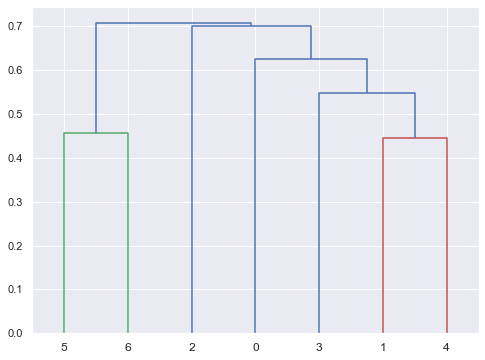

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


5    0.259367
6    0.173046
2    0.166319
0    0.128296
3    0.081382
1    0.096404
4    0.095185
dtype: float64
0    0.128296
1    0.096404
2    0.166319
3    0.081382
4    0.095185
5    0.259367
6    0.173046
dtype: float64
[0.12829628 0.0964043  0.16631929 0.08138162 0.09518528 0.25936716
 0.17304608]
0	|	601	929	876	53	91	2430	3584	|	445.53334225316854
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  999001.4440892532
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.44407810102644735, 0.44407810102644735, 0.0], [0.0, 0.5266048861466942, 0.5266048861466942, 0.44407810102644735], [0.0, 0.6177707154138884, 0.6177707154138884, 0.5266048861466942], [0.0, 0.471486555777122, 0.471486555777122, 0.0], [0.0, 0.6829381287347286, 0.6829381287347286, 0.471486555

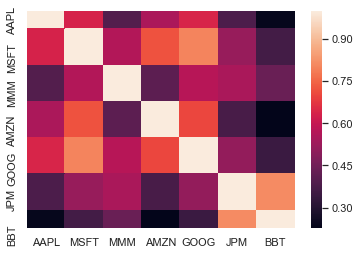

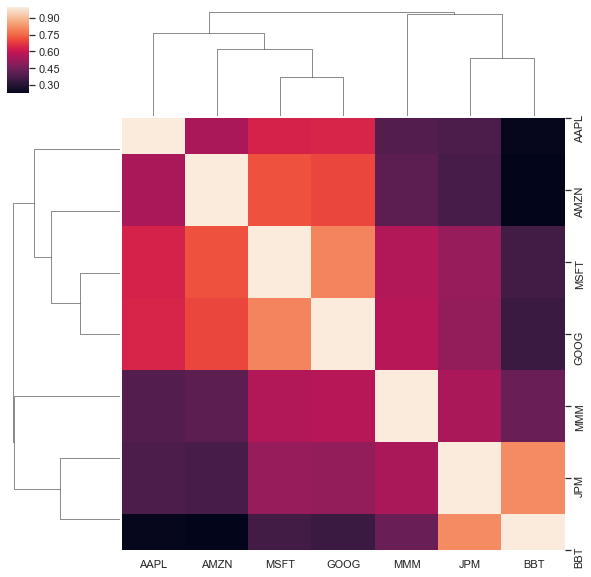

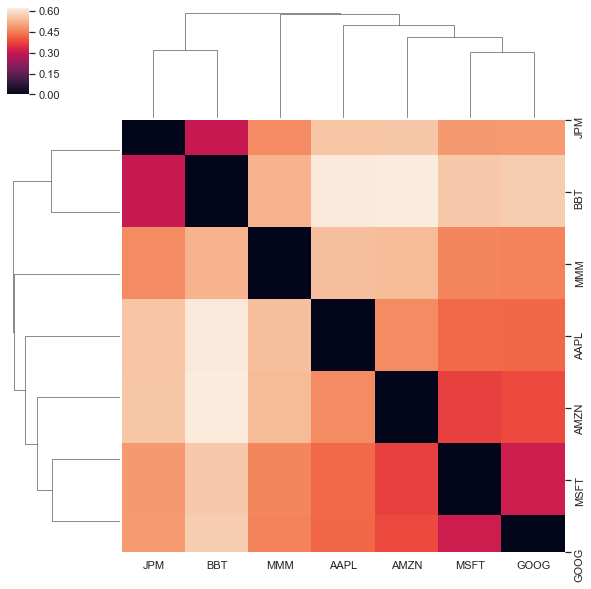

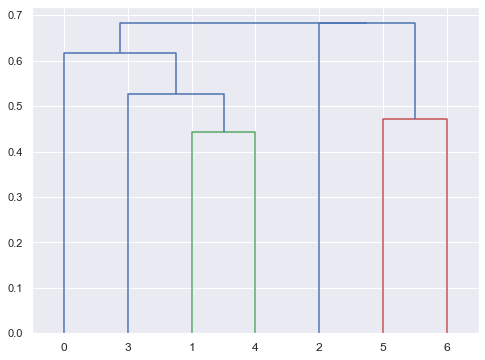

0    0.181274
3    0.069914
1    0.105561
4    0.123287
2    0.170465
5    0.172303
6    0.177196
dtype: float64
0    0.181274
1    0.105561
2    0.170465
3    0.069914
4    0.123287
5    0.172303
6    0.177196
dtype: float64
[0.18127401 0.10556132 0.17046528 0.06991391 0.12328675 0.17230257
 0.17719616]
21	|	1036	983	855	42	116	1606	3594	|	1846.8259599191565
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1026221.6923399192
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.4223073935894175, 0.4223073935894175, 0.0], [0.0, 0.4893900462040965, 0.4893900462040965, 0.4223073935894175], [0.0, 0.5755773054256648, 0.5755773054256648, 0.4893900462040965], [0.0, 0.46508676231600493, 0.46508676231600493, 0.0], [0.0, 0.6303939803064692, 0.6303939803064692, 0.4650

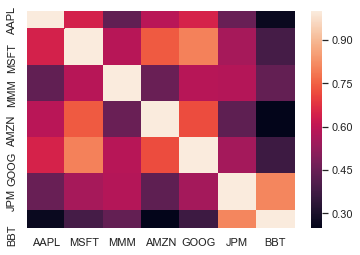

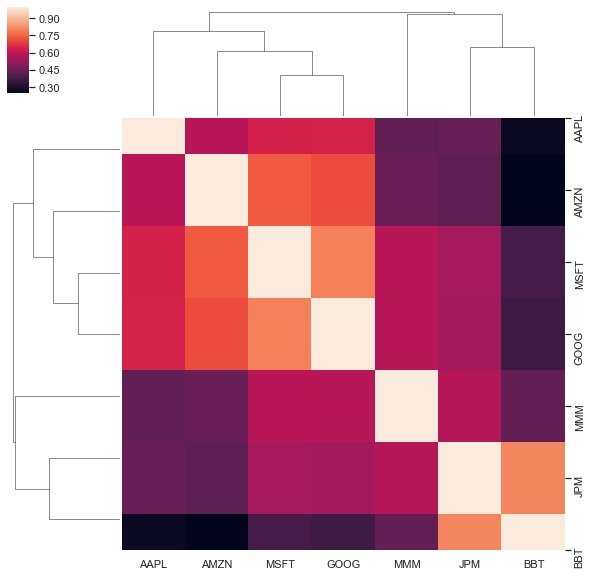

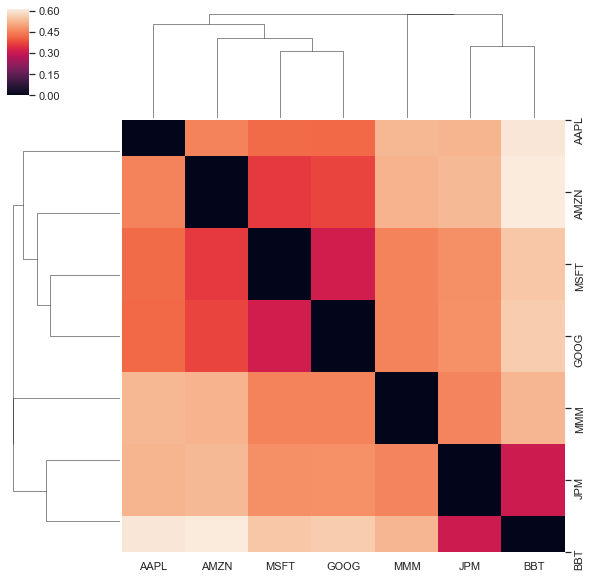

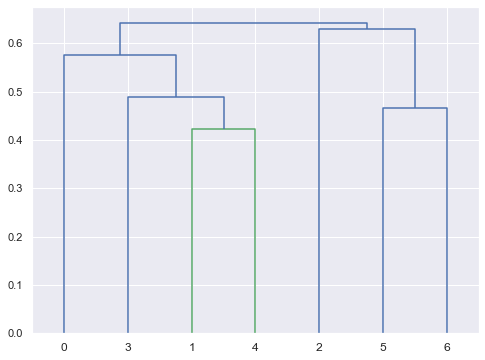

0    0.176767
3    0.063973
1    0.104184
4    0.123121
2    0.171316
5    0.178581
6    0.182058
dtype: float64
0    0.176767
1    0.104184
2    0.171316
3    0.063973
4    0.123121
5    0.178581
6    0.182058
dtype: float64
[0.17676672 0.10418428 0.17131608 0.06397274 0.12312102 0.17858081
 0.18205835]
42	|	1044	961	837	38	109	1677	3826	|	2335.434154445158
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  933068.972832445
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.41856757423187435, 0.41856757423187435, 0.0], [0.0, 0.481736245149296, 0.481736245149296, 0.41856757423187435], [0.0, 0.5581861566734782, 0.5581861566734782, 0.481736245149296], [0.0, 0.4637243932280715, 0.4637243932280715, 0.0], [0.0, 0.6197908121939564, 0.6197908121939564, 0.463724393

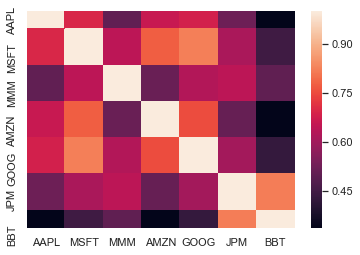

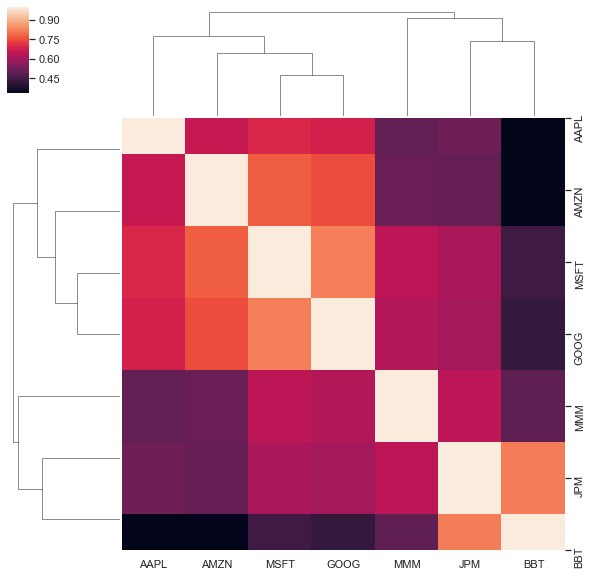

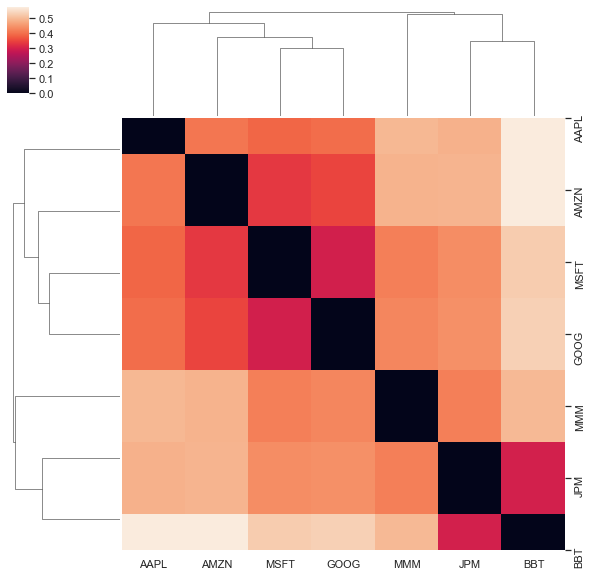

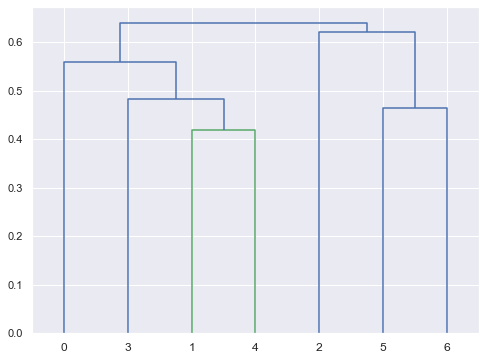

0    0.158252
3    0.065148
1    0.106179
4    0.122605
2    0.173797
5    0.185149
6    0.188871
dtype: float64
0    0.158252
1    0.106179
2    0.173797
3    0.065148
4    0.122605
5    0.185149
6    0.188871
dtype: float64
[0.15825177 0.10617906 0.17379699 0.06514789 0.12260518 0.18514854
 0.18887056]
63	|	936	1018	860	39	108	1756	3809	|	1949.047201252158
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  985662.4835102521
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.44474121597087246, 0.44474121597087246, 0.0], [0.0, 0.4535071095504162, 0.4535071095504162, 0.44474121597087246], [0.0, 0.5695723939412466, 0.5695723939412466, 0.4535071095504162], [0.0, 0.5299365650987935, 0.5299365650987935, 0.0], [0.0, 0.6352604569863834, 0.6352604569863834, 0.52993

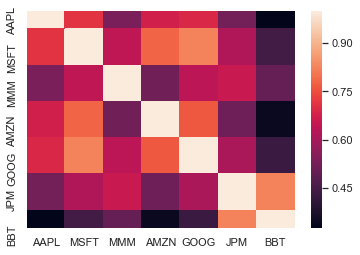

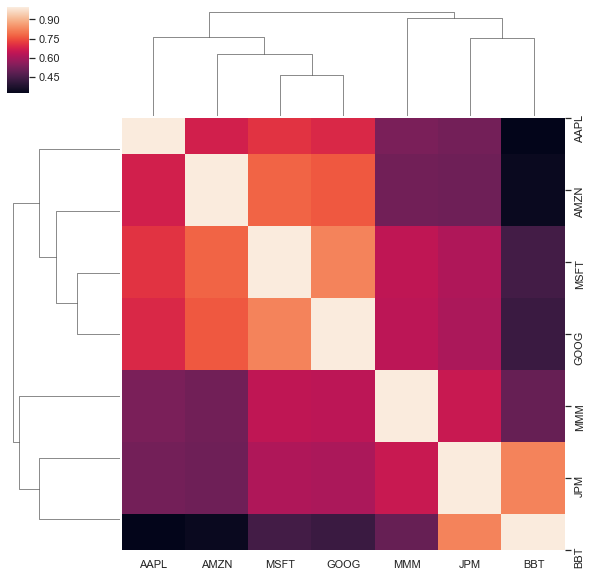

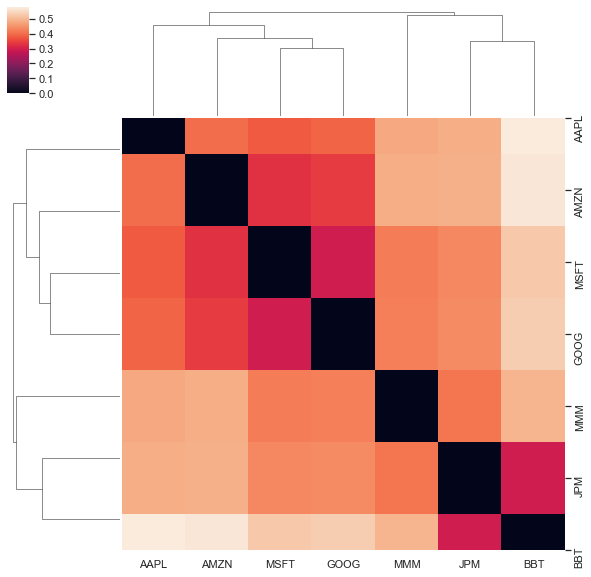

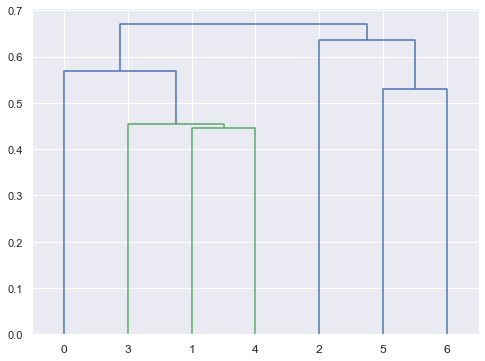

0    0.149142
3    0.058571
1    0.101457
4    0.126831
2    0.176256
5    0.196240
6    0.191504
dtype: float64
0    0.149142
1    0.101457
2    0.176256
3    0.058571
4    0.126831
5    0.196240
6    0.191504
dtype: float64
[0.14914163 0.10145669 0.17625613 0.05857058 0.12683136 0.19623978
 0.19150382]
84	|	872	932	887	35	112	1934	3802	|	1180.751796165158
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1026447.9454541651
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.4461841860866562, 0.4461841860866562, 0.0], [0.0, 0.45217224332606193, 0.45217224332606193, 0.4461841860866562], [0.0, 0.5741282472229821, 0.5741282472229821, 0.45217224332606193], [0.0, 0.5441401712304356, 0.5441401712304356, 0.0], [0.0, 0.6723406467901446, 0.6723406467901446, 0.54414

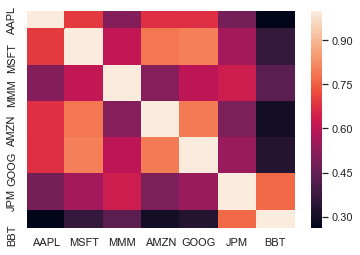

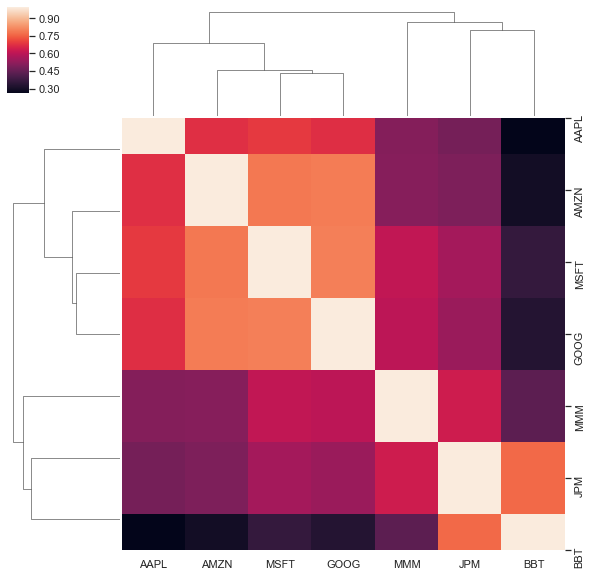

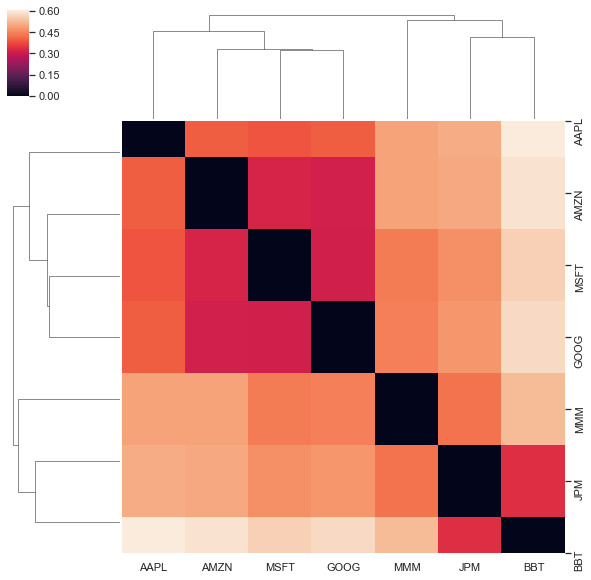

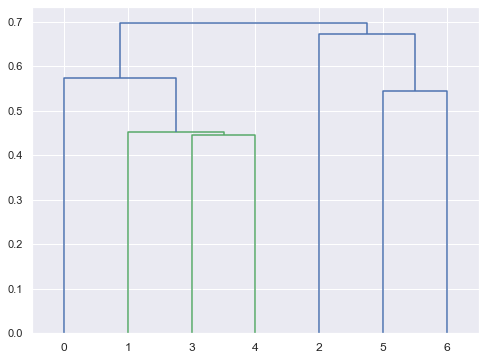

0    0.139598
1    0.108453
3    0.057285
4    0.134143
2    0.184686
5    0.196773
6    0.179062
dtype: float64
0    0.139598
1    0.108453
2    0.184686
3    0.057285
4    0.134143
5    0.196773
6    0.179062
dtype: float64
[0.1395976  0.10845313 0.18468626 0.05728469 0.13414321 0.19677264
 0.17906247]
105	|	756	957	917	33	117	1977	3917	|	1910.9801342581566
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1058921.7497892582
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.46082057443184815, 0.46082057443184815, 0.0], [0.0, 0.4810595406659499, 0.4810595406659499, 0.46082057443184815], [0.0, 0.5716060505783291, 0.5716060505783291, 0.4810595406659499], [0.0, 0.541334026170765, 0.541334026170765, 0.0], [0.0, 0.7302365221671516, 0.7302365221671516, 0.54133

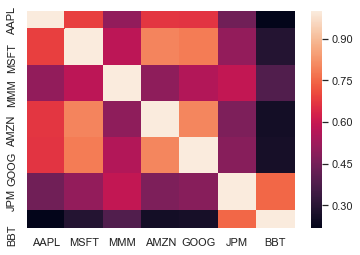

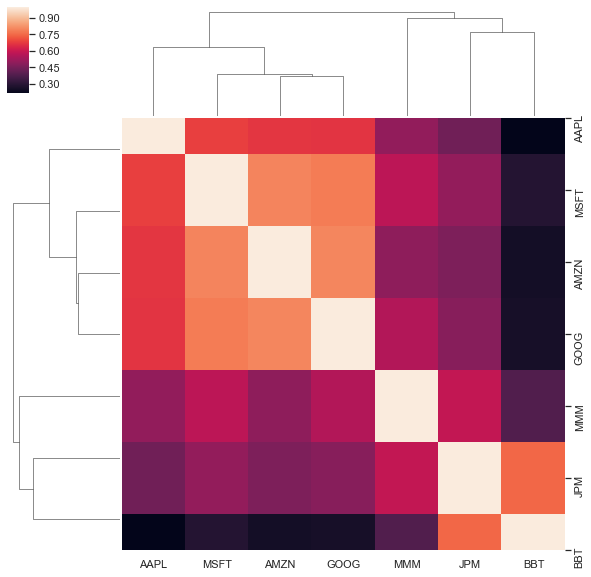

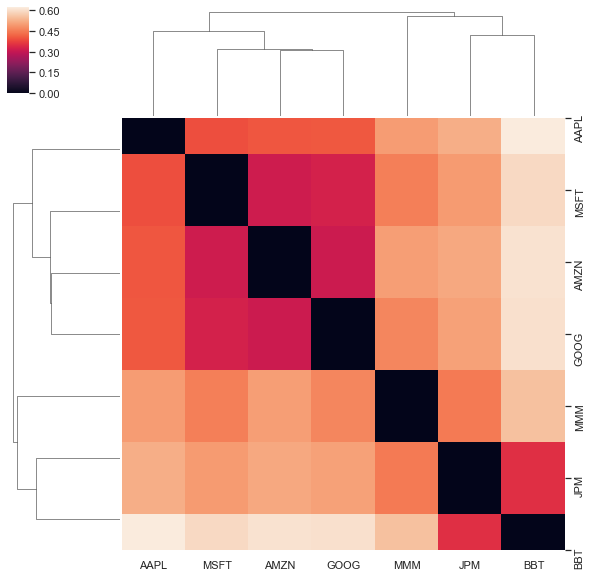

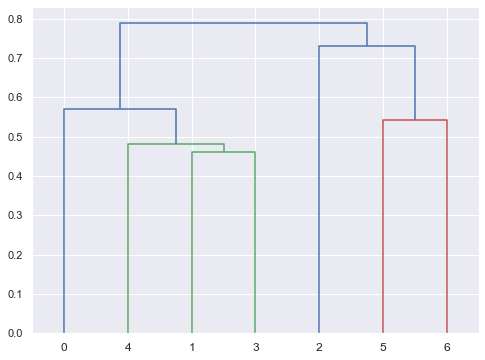

0    0.143775
4    0.104540
1    0.114275
3    0.085444
2    0.166048
5    0.195489
6    0.190429
dtype: float64
0    0.143775
1    0.114275
2    0.166048
3    0.085444
4    0.104540
5    0.195489
6    0.190429
dtype: float64
[0.14377549 0.11427534 0.16604751 0.08544447 0.10453956 0.19548882
 0.19042881]
126	|	738	964	975	47	95	1831	4064	|	2049.2555726751484
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1087776.2807676753
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.45106996370879404, 0.45106996370879404, 0.0], [0.0, 0.4692082018299853, 0.4692082018299853, 0.45106996370879404], [0.0, 0.5735526854434454, 0.5735526854434454, 0.4692082018299853], [0.0, 0.5442511901052446, 0.5442511901052446, 0.0], [0.0, 0.7338065477685242, 0.7338065477685242, 0.5442

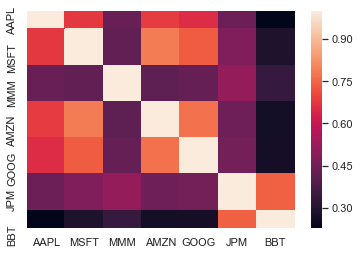

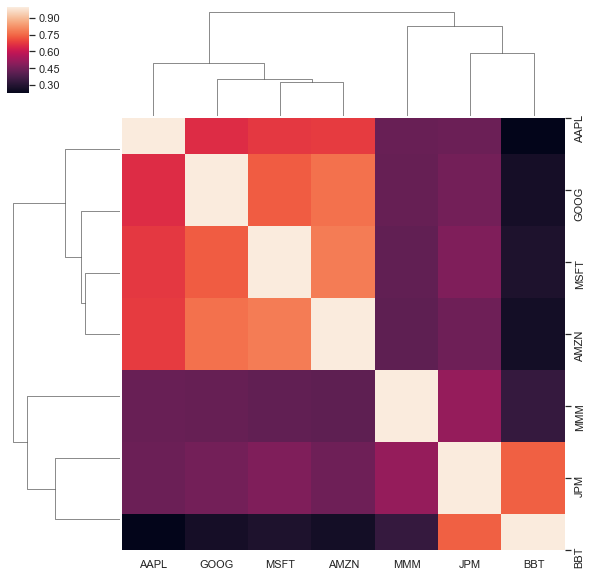

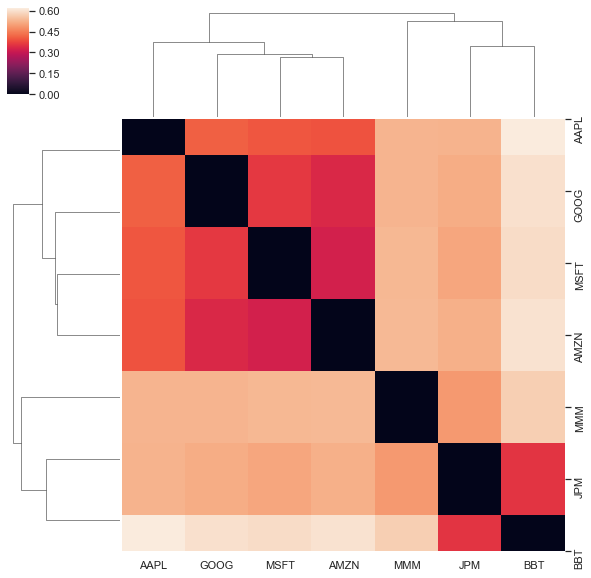

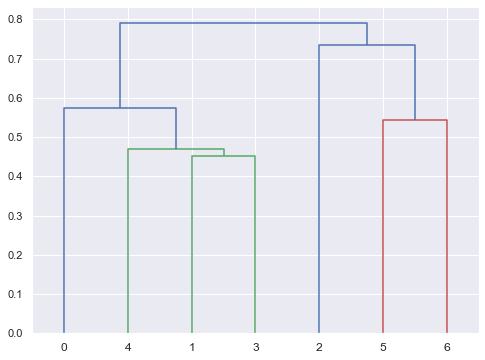

0    0.138007
4    0.100060
1    0.110498
3    0.082198
2    0.166296
5    0.208115
6    0.194825
dtype: float64
0    0.138007
1    0.110498
2    0.166296
3    0.082198
4    0.100060
5    0.208115
6    0.194825
dtype: float64
[0.1380069  0.11049833 0.16629638 0.08219769 0.10006044 0.20811477
 0.1948255 ]
147	|	763	892	1006	47	94	1885	3966	|	1215.0005954921494
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  994210.4878994921
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.45213810832940354, 0.45213810832940354, 0.0], [0.0, 0.4677804382904227, 0.4677804382904227, 0.45213810832940354], [0.0, 0.5675153183266942, 0.5675153183266942, 0.4677804382904227], [0.0, 0.5401695466008138, 0.5401695466008138, 0.0], [0.0, 0.7256477288531227, 0.7256477288531227, 0.5401

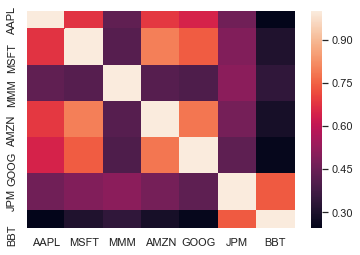

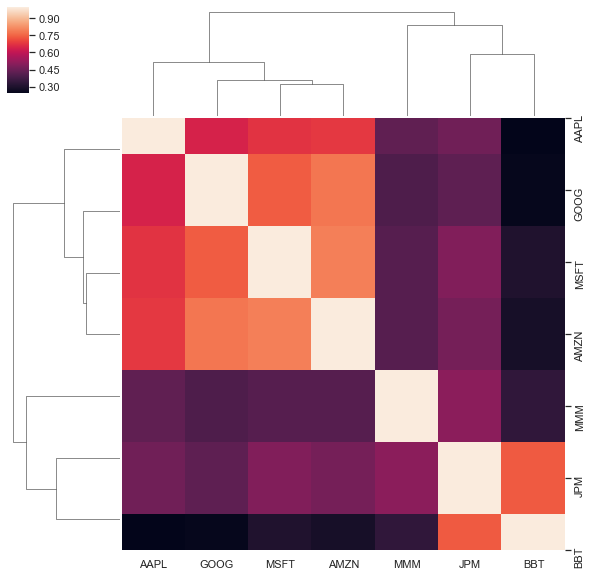

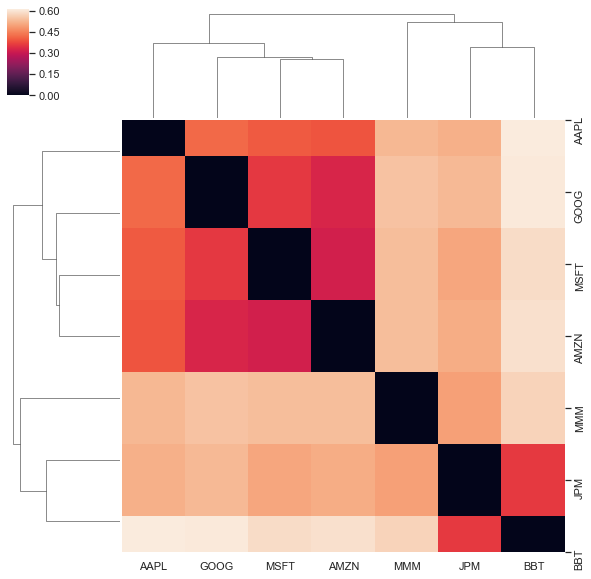

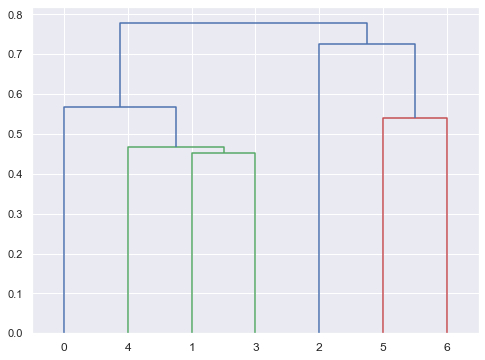

0    0.137340
4    0.102918
1    0.110867
3    0.083549
2    0.165229
5    0.208348
6    0.191749
dtype: float64
0    0.137340
1    0.110867
2    0.165229
3    0.083549
4    0.102918
5    0.208348
6    0.191749
dtype: float64
[0.13733979 0.11086712 0.16522949 0.08354866 0.10291804 0.20834788
 0.19174902]
168	|	711	854	1000	45	97	1956	4140	|	2041.8473571741501
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1059622.1779111743
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.4518051480253064, 0.4518051480253064, 0.0], [0.0, 0.5361293961573372, 0.5361293961573372, 0.4518051480253064], [0.0, 0.5647186714477361, 0.5647186714477361, 0.5361293961573372], [0.0, 0.54059792837547, 0.54059792837547, 0.0], [0.0, 0.6984375643758933, 0.6984375643758933, 0.5405979283

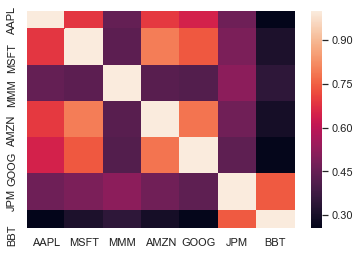

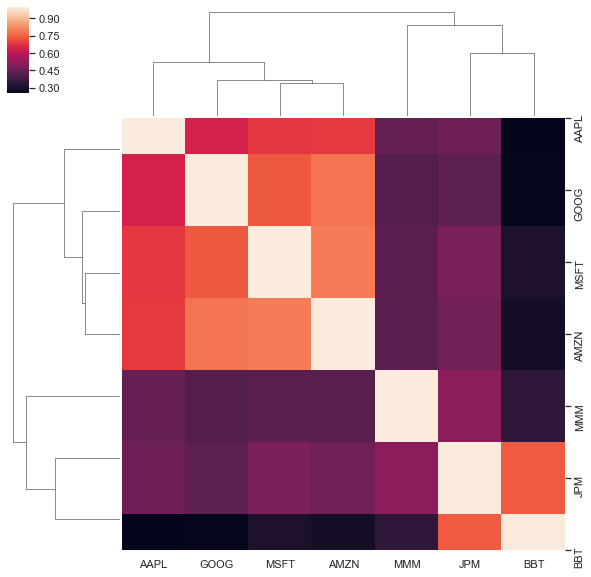

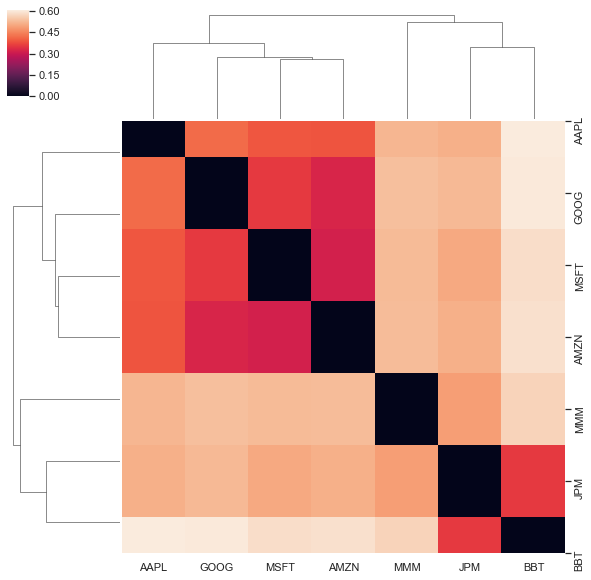

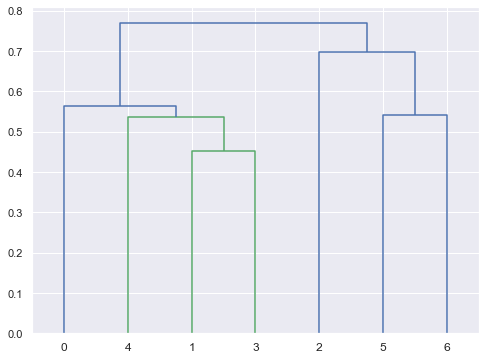

0    0.139004
4    0.094734
1    0.115406
3    0.082938
2    0.160585
5    0.214822
6    0.192510
dtype: float64
0    0.139004
1    0.115406
2    0.160585
3    0.082938
4    0.094734
5    0.214822
6    0.192510
dtype: float64
[0.13900441 0.11540639 0.16058475 0.08293835 0.0947344  0.21482181
 0.1925099 ]
189	|	720	891	995	48	83	2011	4125	|	1731.4662085451505
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1057588.677167545
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.4421960652656207, 0.4421960652656207, 0.0], [0.0, 0.5199347550582001, 0.5199347550582001, 0.4421960652656207], [0.0, 0.5441330804012807, 0.5441330804012807, 0.5199347550582001], [0.0, 0.5110374010477856, 0.5110374010477856, 0.0], [0.0, 0.6761212913131485, 0.6761212913131485, 0.51103740

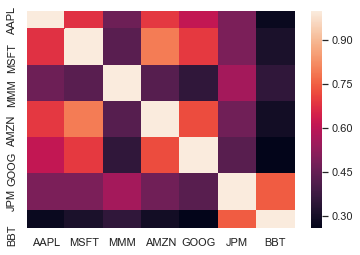

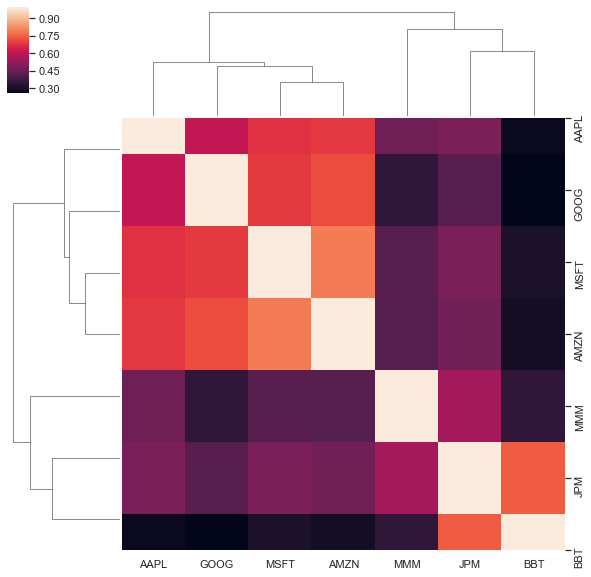

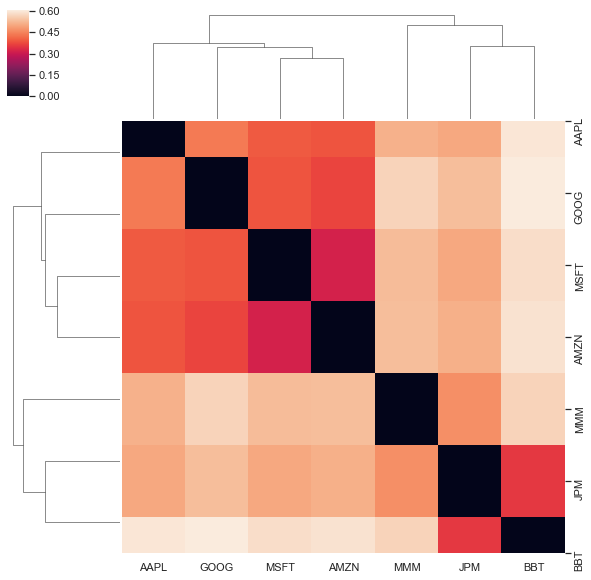

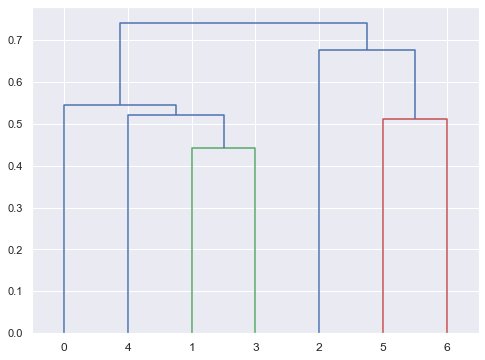

0    0.141515
4    0.098945
1    0.117553
3    0.087092
2    0.161282
5    0.204390
6    0.189223
dtype: float64
0    0.141515
1    0.117553
2    0.161282
3    0.087092
4    0.098945
5    0.204390
6    0.189223
dtype: float64
[0.14151522 0.11755296 0.16128199 0.08709167 0.09894509 0.20438975
 0.1892233 ]
210	|	703	883	1039	49	86	1925	4144	|	2463.29209383815
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1022707.162682838
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.4363406856483595, 0.4363406856483595, 0.0], [0.0, 0.5156381587538775, 0.5156381587538775, 0.4363406856483595], [0.0, 0.5481712128943886, 0.5481712128943886, 0.5156381587538775], [0.0, 0.4961632043868362, 0.4961632043868362, 0.0], [0.0, 0.6576288391441742, 0.6576288391441742, 0.496163204

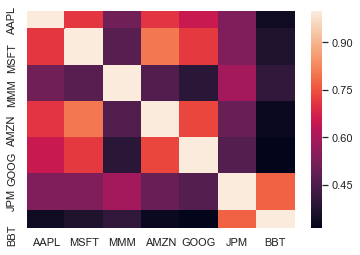

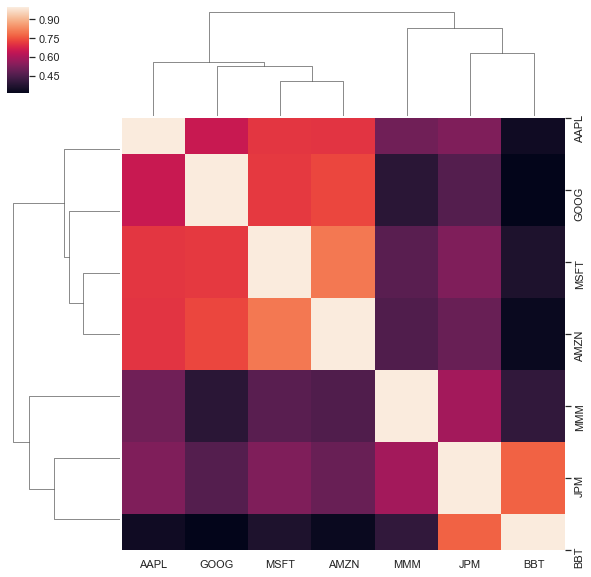

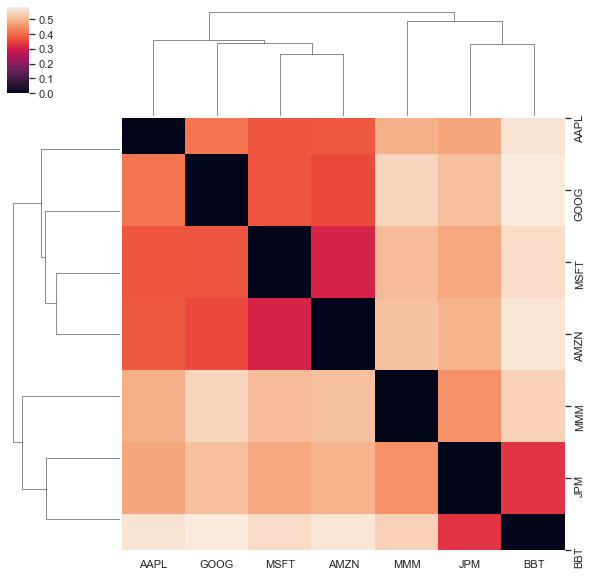

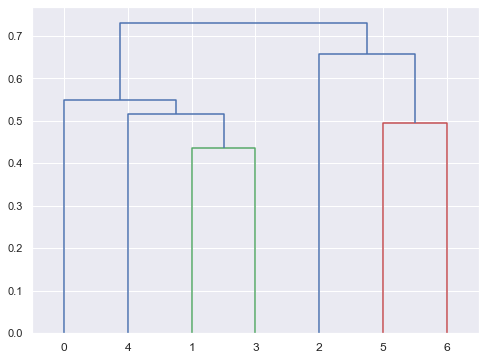

0    0.146414
4    0.101293
1    0.120216
3    0.088639
2    0.158029
5    0.201996
6    0.183413
dtype: float64
0    0.146414
1    0.120216
2    0.158029
3    0.088639
4    0.101293
5    0.201996
6    0.183413
dtype: float64
[0.14641394 0.12021616 0.15802875 0.08863913 0.10129251 0.20199612
 0.18341341]
231	|	703	939	1067	54	90	1875	3777	|	1647.6362184221462
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1051737.668473422
{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [13.75, 13.75, 52.5, 52.5]], 'dcoord': [[0.0, 0.46548025391983966, 0.46548025391983966, 0.0], [0.0, 0.5500018398000093, 0.5500018398000093, 0.46548025391983966], [0.0, 0.5640629269897205, 0.5640629269897205, 0.5500018398000093], [0.0, 0.48213252640653076, 0.48213252640653076, 0.0], [0.0, 0.663914017806134, 0.663914017806134, 0.4821

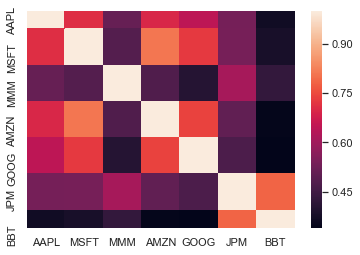

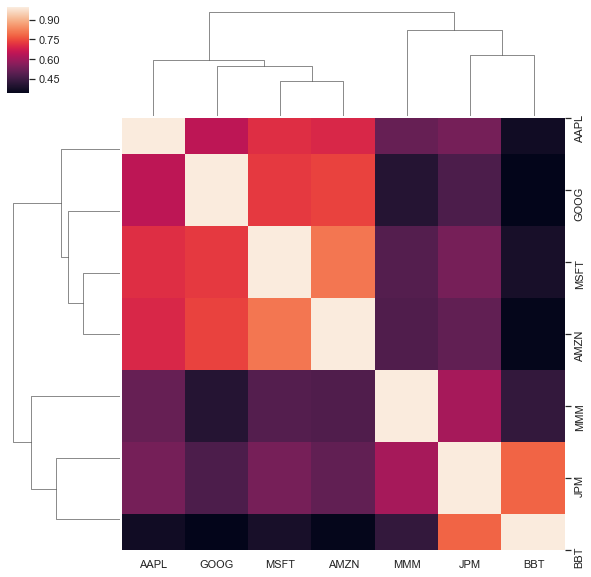

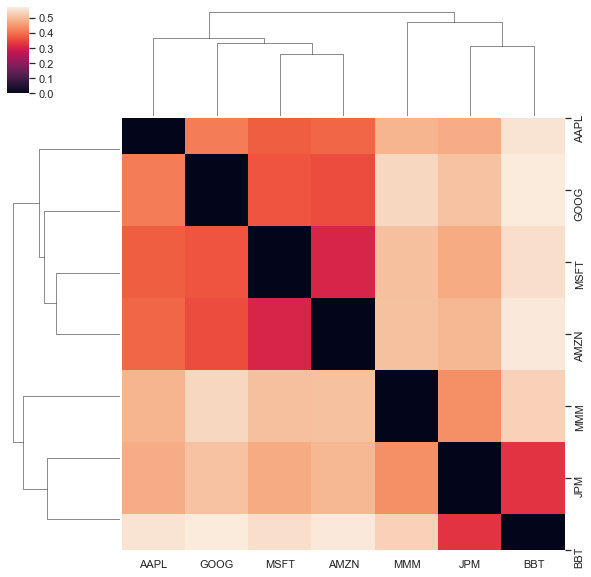

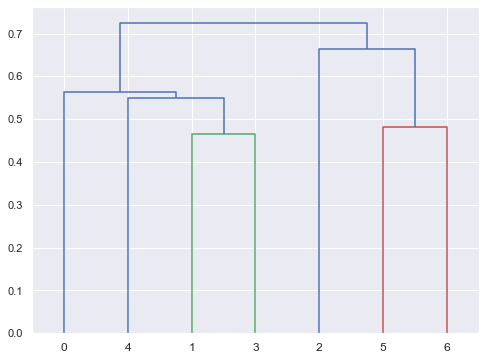

0    0.144063
4    0.110879
1    0.136543
3    0.101339
2    0.145074
5    0.184884
6    0.177219
dtype: float64
0    0.144063
1    0.136543
2    0.145074
3    0.101339
4    0.110879
5    0.184884
6    0.177219
dtype: float64
[0.14406266 0.13654338 0.14507386 0.10133863 0.11087898 0.18488351
 0.17721899]
252	|	655	1077	994	64	99	1674	3778	|	1697.567058185151
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  1131041.016933185


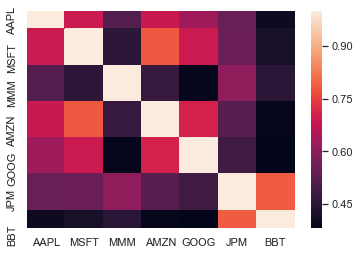

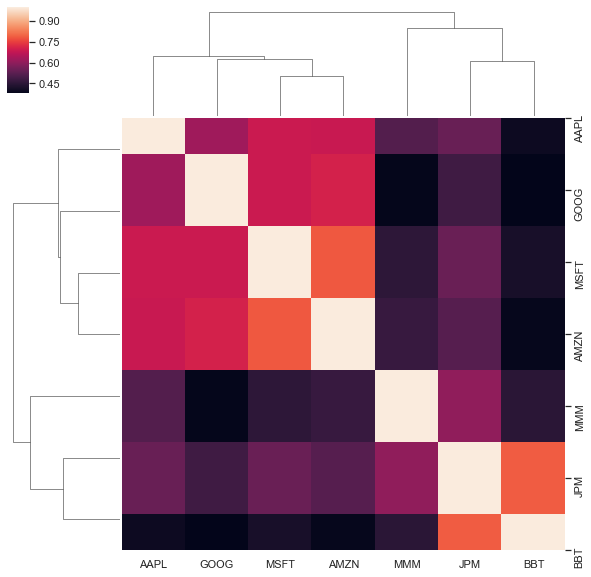

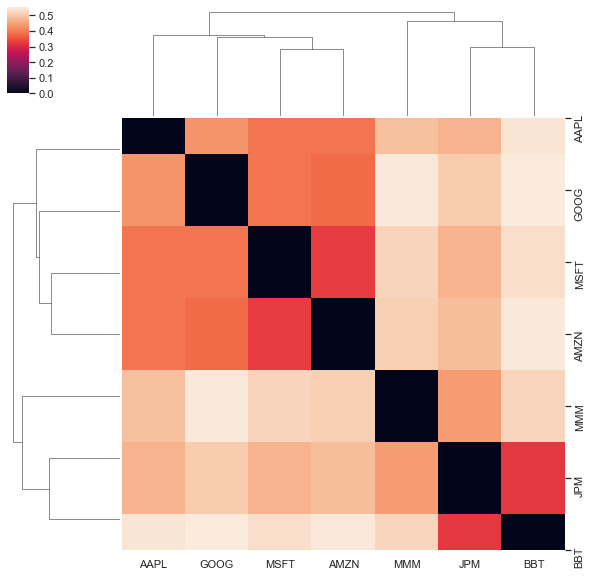

In [46]:
rf = 0.02  # Risk-free rate
HRP_budgets = []
HRP_weights = []
HRP_budgets_ret = []
HRP_stock = []
results = []
stocks = [0] * 7
budget = 1000000
HRP_budgets_ret.append(0)
HRP_weights.append(0)
HRP_budgets.append(0)
HRP_stock.append(0)
transaction_budget = budget
transactionCostFactor = 0.001
output = '{}\t|\t'.format('day')
for name in names:
    output += '{} \t'.format(name)
output += '|\t{}'.format('Budget')
print(output)
print('-'*100)
print('{}\t|\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t|\t{}'.format(0,stocks[0], stocks[1], stocks[2], 
                                                          stocks[3], stocks[4], stocks[5],
                                                          stocks[6],
                                                          budget)) 

for i in range(13):
    start_idx = int((i*21) + 1)
    end_idx = int(start_idx + 252)
    
    
    assets = assetst[start_idx:end_idx]
    returns = assets.pct_change().dropna()
    #print (returns.head())
    corr = returns.corr()
    d_corr = np.sqrt(0.5*(1-corr))
    #print(d_corr)
    link = linkage(d_corr, 'single')
    #print(link)
    Z = pd.DataFrame(link)
    #print(Z)

    fig = plt.figure(figsize=(8, 6))
    dn = dendrogram(Z)
    print(dn)
    plt.show()
    sb.heatmap(corr)
    sb.clustermap(corr,method='single')
    sb.clustermap(d_corr,method='single')
    sort_ix = get_quasi_diag(link)
    cov = returns.cov()
    weights = get_rec_bipart(cov, sort_ix)
    print (weights)
    weights = weights.sort_index(ascending=True)
    print (weights)

    
    current_prices = prices[:,((i*21)+1)+252] #mishe roze baad az balayi chon ta nadare, yani balayi age 253 bashe in 554e
    current_budget = budget
    
    
    
    #print (type(res.W))
    #weights = res.W
    weights = np.array(weights)
    weightss = np.array(weights)
    print (weights)
    current_budget = budget
    transaction_budget = (current_budget + np.sum(current_prices*stocks))
    for index, (weights, current_closed_price) in enumerate(zip(weights, current_prices)):
        number_of_stock = int((weights * transaction_budget)/current_closed_price)
        if number_of_stock > stocks[index]: # buy
            total_cost = (number_of_stock - stocks[index]) * current_closed_price
            budget -= total_cost
            budget -= (total_cost * transactionCostFactor)
        elif number_of_stock < stocks[index]: # sell
            total_cost = (stocks[index] - number_of_stock) * current_closed_price
            budget += total_cost
            budget -= (total_cost * transactionCostFactor)
        stocks[index] = number_of_stock
        
        
    print('{}\t|\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t|\t{}'.format(((i*21)),stocks[0], stocks[1], stocks[2], 
                                                          stocks[3], stocks[4], stocks[5],
                                                          stocks[6],
                                                          budget))
    print('-'*100)
    print("Budget after selling all stocks of this day: ", budget + (stocks[0]*prices[0,((i*21)+1)+252]) + 
          (stocks[1]*prices[1,((i*21)+1)+252]) + (stocks[2]*prices[2,((i*21)+1)+252]) + (stocks[3]*prices[3,((i*21)+1)+252]) +
          (stocks[4]*prices[4,((i*21)+1)+252]) + (stocks[5]*prices[5,((i*21)+1)+252]) +
          (stocks[6]*prices[6,((i*21)+1)+252]))
    HRP_budgets_ret.append(((budget + (stocks[0]*prices[0,((i*21)+1)+252]) + (stocks[1]*prices[1,((i*21)+1)+252]) +
          (stocks[2]*prices[2,((i*21)+1)+252]) + (stocks[3]*prices[3,((i*21)+1)+252]) +
          (stocks[4]*prices[4,((i*21)+1)+252]) + (stocks[5]*prices[5,((i*21)+1)+252]) +
          (stocks[6]*prices[6,((i*21)+1)+252])) /1000000)-1)
    HRP_weights.append(weightss)
    HRP_budgets.append(budget + (stocks[0]*prices[0,((i*21)+1)+252]) + (stocks[1]*prices[1,((i*21)+1)+252]) +
          (stocks[2]*prices[2,((i*21)+1)+252]) + (stocks[3]*prices[3,((i*21)+1)+252]) +
          (stocks[4]*prices[4,((i*21)+1)+252]) + (stocks[5]*prices[5,((i*21)+1)+252]) +
          (stocks[6]*prices[6,((i*21)+1)+252]))
    HRP_stock.append((stocks[0], stocks[1], stocks[2], 
                                                          stocks[3], stocks[4], stocks[5],
                                                          stocks[6]))
                              

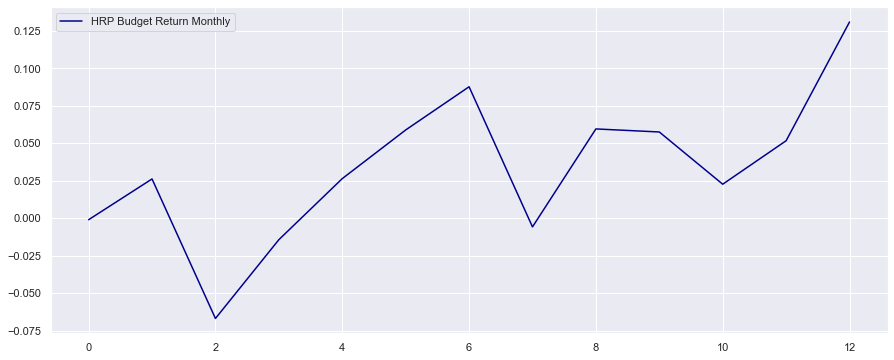

In [36]:
pp.figure(figsize=(15,6))
plt.plot(HRP_budgets_ret [1:14],color='darkblue')
pp.legend(['HRP Budget Return Monthly'],loc='upper left')

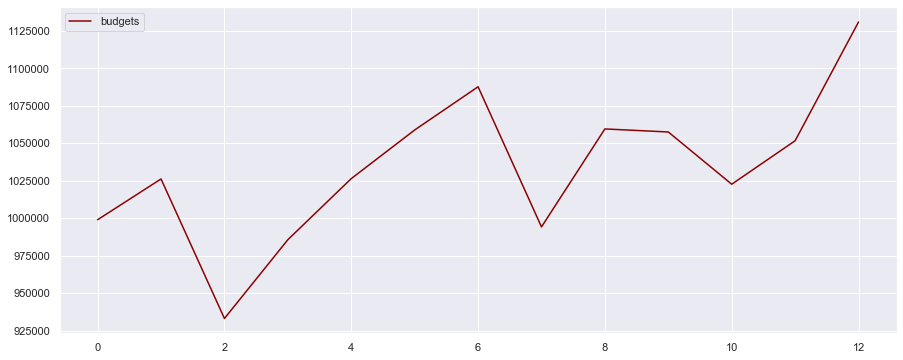

In [37]:
pp.figure(figsize=(15,6))
plt.plot(HRP_budgets[1:251],color='darkred')
pp.legend(['budgets'],loc='upper left')

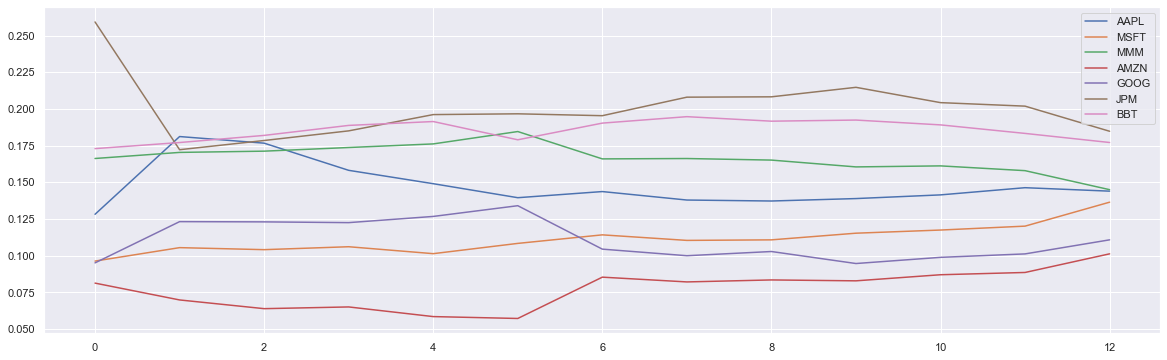

In [38]:
pp.figure(figsize=(20,6))
plt.plot(HRP_weights[1:251])
pp.legend([ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT'])
#pp.legend(['Markowitz Weights'],loc='down left')

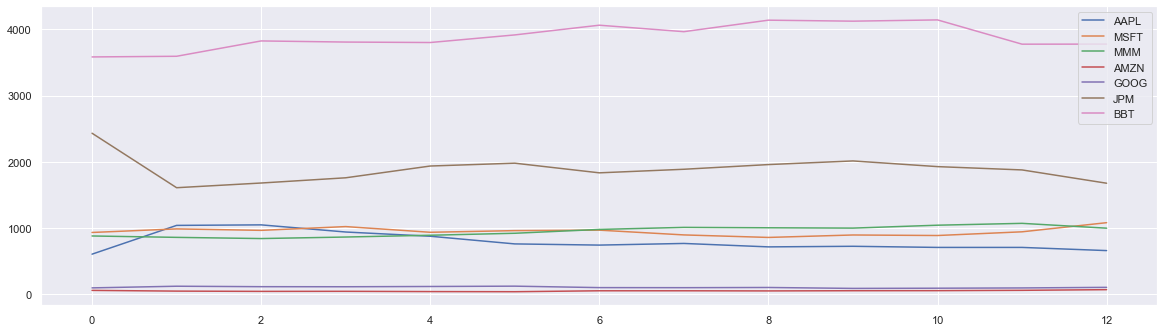

In [39]:
pp.figure(figsize=(20,5.5))
plt.plot(HRP_stock[1:251])
pp.legend([ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT'])

In [40]:
pd.DataFrame(HRP_stock[1:251], columns=[ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT'])

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
0,601,929,876,53,91,2430,3584
1,1036,983,855,42,116,1606,3594
2,1044,961,837,38,109,1677,3826
3,936,1018,860,39,108,1756,3809
4,872,932,887,35,112,1934,3802
5,756,957,917,33,117,1977,3917
6,738,964,975,47,95,1831,4064
7,763,892,1006,47,94,1885,3966
8,711,854,1000,45,97,1956,4140
9,720,891,995,48,83,2011,4125


In [41]:
pd.DataFrame(HRP_weights[1:251], columns=[ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT'])

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
0,0.128296,0.096404,0.166319,0.081382,0.095185,0.259367,0.173046
1,0.181274,0.105561,0.170465,0.069914,0.123287,0.172303,0.177196
2,0.176767,0.104184,0.171316,0.063973,0.123121,0.178581,0.182058
3,0.158252,0.106179,0.173797,0.065148,0.122605,0.185149,0.188871
4,0.149142,0.101457,0.176256,0.058571,0.126831,0.196240,0.191504
5,0.139598,0.108453,0.184686,0.057285,0.134143,0.196773,0.179062
6,0.143775,0.114275,0.166048,0.085444,0.104540,0.195489,0.190429
7,0.138007,0.110498,0.166296,0.082198,0.100060,0.208115,0.194825
8,0.137340,0.110867,0.165229,0.083549,0.102918,0.208348,0.191749
9,0.139004,0.115406,0.160585,0.082938,0.094734,0.214822,0.192510


In [42]:
pd.DataFrame(HRP_budgets_ret)

,0
0,0.000000
1,-0.000999
2,0.026222
3,-0.066931
4,-0.014338
5,0.026448
6,0.058922
7,0.087776
8,-0.005790
9,0.059622


In [43]:
pd.DataFrame(HRP_budgets)

,0
0,0.000000e+00
1,9.990014e+05
2,1.026222e+06
3,9.330690e+05
4,9.856625e+05
5,1.026448e+06
6,1.058922e+06
7,1.087776e+06
8,9.942105e+05
9,1.059622e+06


In [44]:
HRP_stock = pd.DataFrame(HRP_stock[1:251], columns=[ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT'])
HRP_stock.to_excel (r'D:\HRP_stock.xlsx', index = True, header=True)

In [45]:
HRP_weights = pd.DataFrame(HRP_weights[1:251], columns=[ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT'])
HRP_weights.to_excel (r'D:\HRP_weights.xlsx', index = True, header=True)

In [47]:
HRP_budgets_ret = pd.DataFrame(HRP_budgets_ret)
HRP_budgets_ret.to_excel (r'D:\HRP_budgets_ret.xlsx', index = True, header=True)

In [48]:
HRP_budgets =pd.DataFrame(HRP_budgets)
HRP_budgets.to_excel (r'D:\HRP_budgets.xlsx', index = True, header=True)